In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [17]:
question_to_topic = { 1 : ('clarity', False), 
                      2 : ('usability', True),
                      3 : ('accuracy', True),
                      4 : ('clarity', False),
                      5 : ('clarity', True),
                      6 : ('brevity', True),
                      7 : ('affect', False),
                      8 : ('accuracy', False),
                      9 : ('usability', False),
                      10 : ('affect', True),
                      11 : ('brevity', False),
                      12 : ('usability', False),
                      13 : ('brevity', False),
                      14 : ('usability', True),
                      15 : ('affect', True),
                      16 : ('clarity', True),
                      17 : ('accuracy', False),
                      18 : ('affect', False),
                      19 : ('brevity', True),
                      20 : ('accuracy', True)
                    }

In [28]:
responses_test = {'clarity': [], 'brevity': [], 'usability': [], 'affect': [], 'accuracy': [], 'total': []}
responses_control = {'clarity': [], 'brevity': [], 'usability': [], 'affect': [], 'accuracy': [], 'total': []}

with open('responses.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if len(row[1]) == 3:
            ID = int(row[1])
            condition = ID % 2
            
            for i in range(20):
                topic, positive = question_to_topic[i + 1]
                rating = int(row[5 + i])
                
                if not positive:
                    rating = 6 - rating
                
                if condition == 1:
                    responses_test[topic].append(rating)
                    responses_test['total'].append(rating)
                else:
                    responses_control[topic].append(rating)
                    responses_control['total'].append(rating)

In [54]:
def plot(topic, condition):
    categories = np.arange(5) + 1

    def count(cat, responses):
        return len([x for x in responses if x == cat])

    if condition == 'test':
        plt.bar(categories, [count(cat, responses_test[topic]) for cat in categories])
    else:
        plt.bar(categories, [count(cat, responses_control[topic]) for cat in categories])
    plt.xlabel('response')
    plt.ylabel('frequency')
    plt.title('Distribution of responses regarding ' + topic + ' in ' + condition + ' condition')

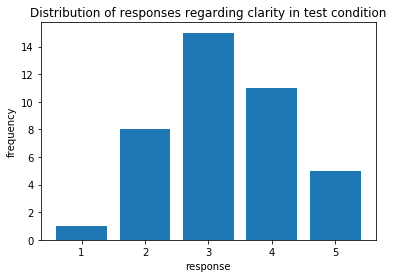

In [57]:
plot('clarity', 'test')

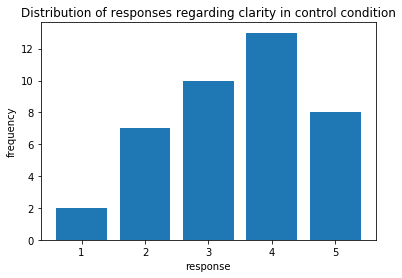

In [58]:
plot('clarity', 'control')